In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [21]:
import os # use commandline  
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
bank_data = pd.read_csv(io.BytesIO(uploaded['bank-data.csv']))

Saving bank-data.csv to bank-data (3).csv


In [22]:
bank_data.head(20)

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
5,ID12106,57,FEMALE,TOWN,37869.60,YES,2,NO,YES,YES,NO,YES
6,ID12107,22,MALE,RURAL,8877.07,NO,0,NO,NO,YES,NO,YES
7,ID12108,58,MALE,TOWN,24946.60,YES,0,YES,YES,YES,NO,NO
8,ID12109,37,FEMALE,SUBURBAN,25304.30,YES,2,YES,NO,NO,NO,NO
9,ID12110,54,MALE,TOWN,24212.10,YES,2,YES,YES,YES,NO,NO


In [23]:
newdata = bank_data.drop(['id'],axis=1)
newdata['region'] = newdata['region'].replace({'INNER_CITY':0, 'TOWN':1,'RURAL':2,'SUBURBAN':3})
newdata['sex'] = newdata['sex'].replace({'FEMALE':1, 'MALE':0})
newdata['married'] = newdata['married'].replace({'YES':1, 'NO':0})
newdata['car'] = newdata['car'].replace({'YES':1, 'NO':0})
newdata['save_act'] = newdata['save_act'].replace({'YES':1, 'NO':0})
newdata['current_act'] = newdata['current_act'].replace({'YES':1, 'NO':0})
newdata['mortgage'] = newdata['mortgage'].replace({'YES':1, 'NO':0})
newdata

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,1,0,17546.00,0,1,0,0,0,0,YES
1,40,0,1,30085.10,1,3,1,0,1,1,NO
2,51,1,0,16575.40,1,0,1,1,1,0,NO
3,23,1,1,20375.40,1,3,0,0,1,0,NO
4,57,1,2,50576.30,1,0,0,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,0,47025.00,0,2,1,1,1,1,NO
596,30,1,0,9672.25,1,0,1,1,1,0,NO
597,31,1,1,15976.30,1,0,1,1,0,0,YES
598,29,0,0,14711.80,1,0,0,1,0,1,NO


In [24]:
print(newdata)

     age  sex  region    income  ...  save_act  current_act  mortgage  pep
0     48    1       0  17546.00  ...         0            0         0  YES
1     40    0       1  30085.10  ...         0            1         1   NO
2     51    1       0  16575.40  ...         1            1         0   NO
3     23    1       1  20375.40  ...         0            1         0   NO
4     57    1       2  50576.30  ...         1            0         0   NO
..   ...  ...     ...       ...  ...       ...          ...       ...  ...
595   61    1       0  47025.00  ...         1            1         1   NO
596   30    1       0   9672.25  ...         1            1         0   NO
597   31    1       1  15976.30  ...         1            0         0  YES
598   29    0       0  14711.80  ...         1            0         1   NO
599   38    0       1  26671.60  ...         0            1         1  YES

[600 rows x 11 columns]


In [25]:
print ("Dataset Shape: ", newdata.shape) 
bank_data.describe()

Dataset Shape:  (600, 11)


,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [26]:
# Reading the Iris.csv file
X = newdata.iloc[:,0:10].values
y = newdata.iloc[:,10].values # attribute 4 is label data

In [27]:
from collections import Counter
from sklearn.model_selection import train_test_split
# Creating Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(Counter(y_train))
print(Counter(y_test))

(450, 10) (150, 10) (450,) (150,)
Counter({'NO': 235, 'YES': 215})
Counter({'NO': 91, 'YES': 59})


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8266666666666667


In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[77 14]
 [12 47]]


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          NO       0.87      0.85      0.86        91
         YES       0.77      0.80      0.78        59

    accuracy                           0.83       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.83      0.83      0.83       150



[Text(0.765, 0.9615384615384616, 'X[3] <= 51291.801\ngini = 0.499\nsamples = 450\nvalue = [235, 215]'),
 Text(0.5566666666666666, 0.8846153846153846, 'X[5] <= 1.5\ngini = 0.495\nsamples = 419\nvalue = [230, 189]'),
 Text(0.32166666666666666, 0.8076923076923077, 'X[5] <= 0.5\ngini = 0.498\nsamples = 275\nvalue = [128, 147]'),
 Text(0.15666666666666668, 0.7307692307692307, 'X[4] <= 0.5\ngini = 0.475\nsamples = 178\nvalue = [109, 69]'),
 Text(0.06666666666666667, 0.6538461538461539, 'X[9] <= 0.5\ngini = 0.437\nsamples = 62\nvalue = [20, 42]'),
 Text(0.04, 0.5769230769230769, 'X[3] <= 16479.6\ngini = 0.111\nsamples = 34\nvalue = [2, 32]'),
 Text(0.02666666666666667, 0.5, 'X[0] <= 32.5\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.013333333333333334, 0.4230769230769231, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.04, 0.4230769230769231, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.05333333333333334, 0.5, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.093333

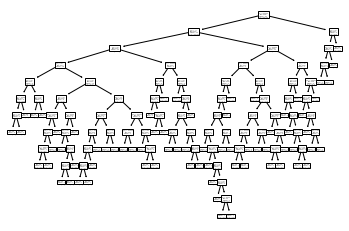

In [31]:
from sklearn import tree
tree.plot_tree(clf)

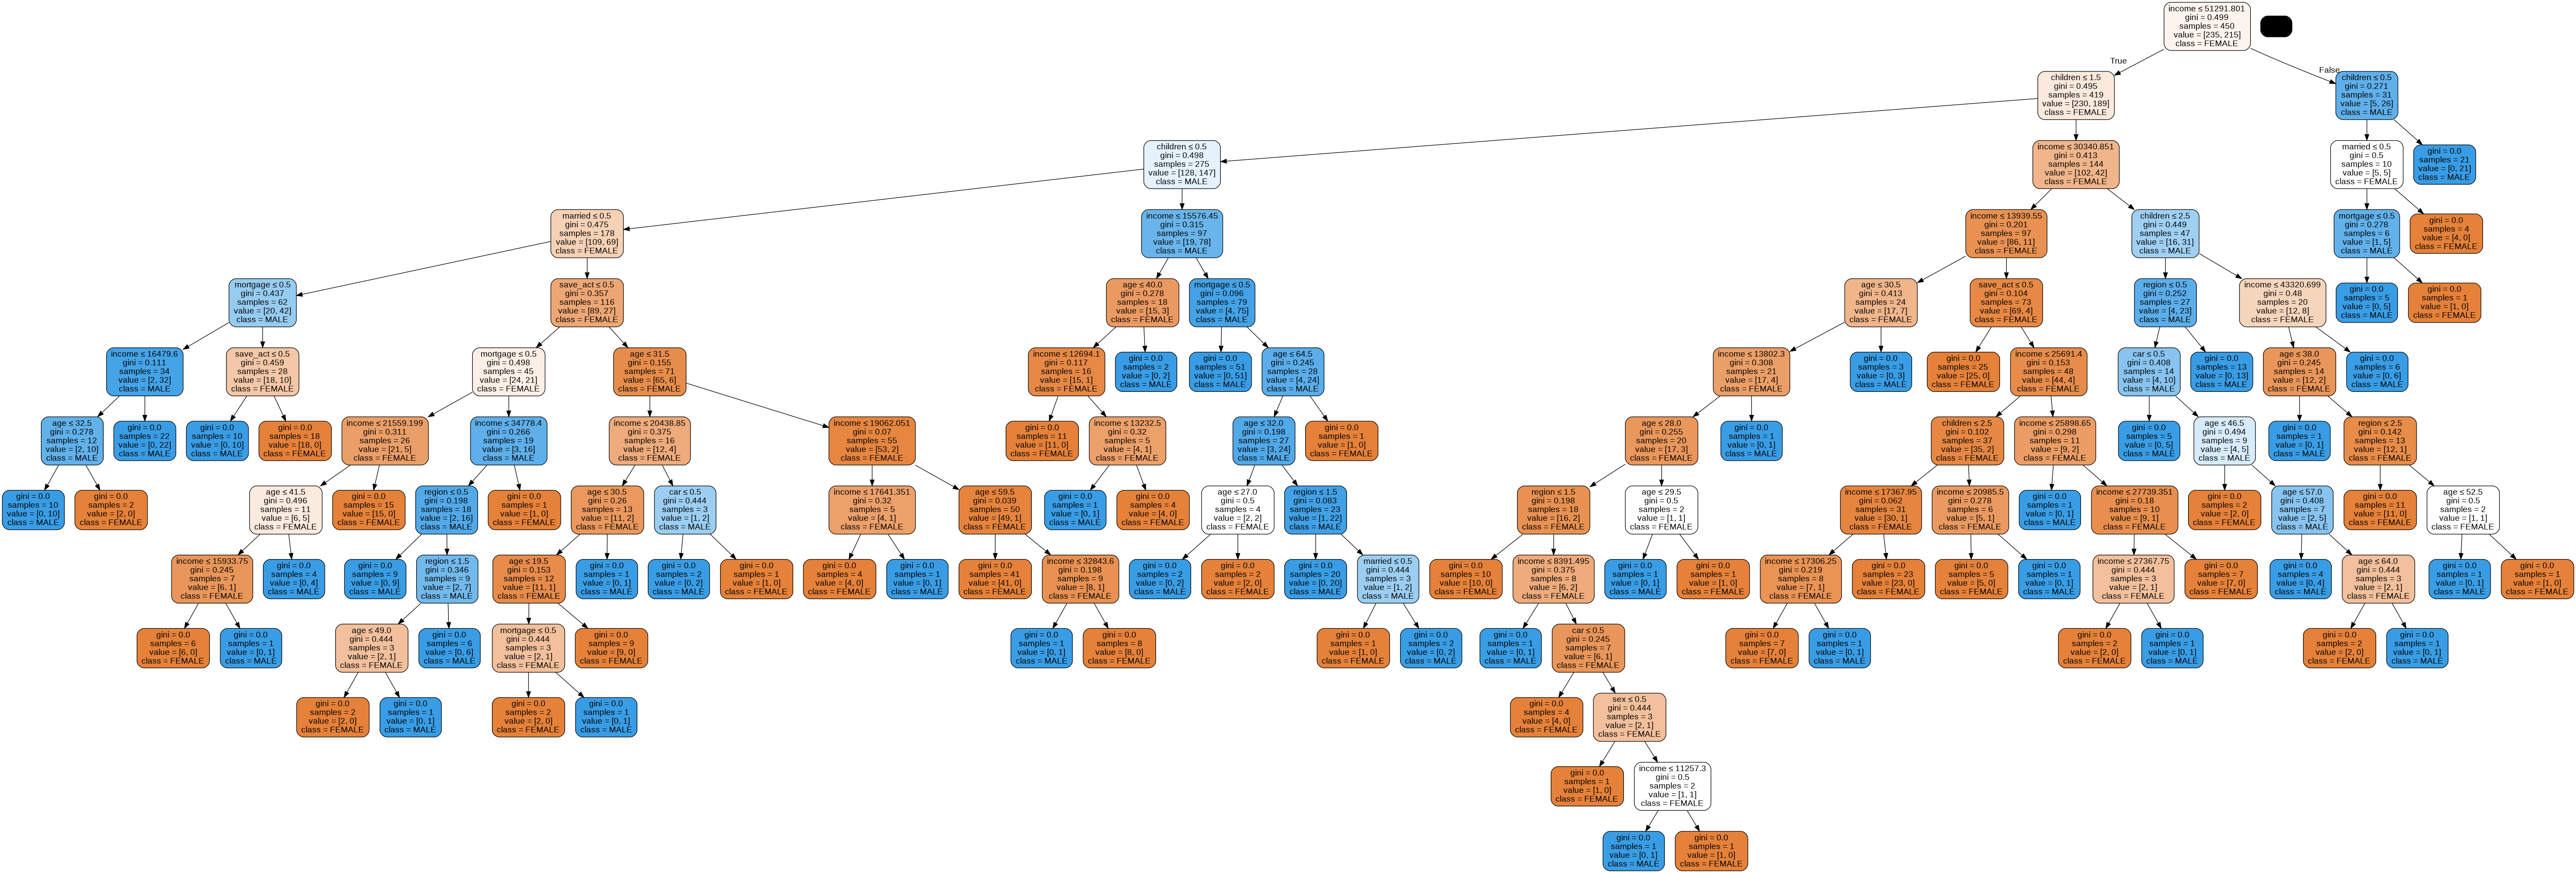

In [32]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_cols = ['age','sex','region','income','married','children','car','save_act','current_act','mortgage']
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['FEMALE','MALE','INNER_CITY','TOWN','RURAL','SUBURBAN','YES','NO'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())
#Values are number of instances per class.

In [33]:
from sklearn.tree import export_text
clf = DecisionTreeClassifier(random_state=0)
decision_tree = clf.fit(X_train,y_train)
rules = export_text(decision_tree, feature_names=feature_cols)
print(rules)

|--- income <= 51291.80
|   |--- children <= 1.50
|   |   |--- children <= 0.50
|   |   |   |--- married <= 0.50
|   |   |   |   |--- mortgage <= 0.50
|   |   |   |   |   |--- income <= 16479.60
|   |   |   |   |   |   |--- age <= 32.50
|   |   |   |   |   |   |   |--- class: YES
|   |   |   |   |   |   |--- age >  32.50
|   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |--- income >  16479.60
|   |   |   |   |   |   |--- class: YES
|   |   |   |   |--- mortgage >  0.50
|   |   |   |   |   |--- save_act <= 0.50
|   |   |   |   |   |   |--- class: YES
|   |   |   |   |   |--- save_act >  0.50
|   |   |   |   |   |   |--- class: NO
|   |   |   |--- married >  0.50
|   |   |   |   |--- save_act <= 0.50
|   |   |   |   |   |--- mortgage <= 0.50
|   |   |   |   |   |   |--- income <= 21559.20
|   |   |   |   |   |   |   |--- age <= 41.50
|   |   |   |   |   |   |   |   |--- income <= 15933.75
|   |   |   |   |   |   |   |   |   |--- class: NO
|   |   |   |   |   |   |   |   |--

In [34]:
Y_pred=clf.predict(X_test)
print(Y_pred)

['YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES'
 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'NO']


In [35]:
X=[[45,1 ,2 ,17510.00,1,2,1,1,1,1],[38,1 ,2 ,23510.00,0,0,1,1,1,1],[20,1 ,2 ,42500.00,1,1,1,1,1,1]]  #two unseen data
Y_pred=clf.predict(X)
print(Y_pred)

['NO' 'NO' 'NO']
